importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

loading the data

In [2]:
df = pd.read_csv('Data/stud.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the data

In [3]:
df.shape

(1000, 8)

Checking the missing values

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values in the given dataset

Checking for duplicate values in the dataset

In [5]:
df.duplicated().sum()

0

No duplicate values

Checking Null values and data types of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values in each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Checking the statistics of the dataset

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring the dataset

In [8]:
print("Sub_Categories in 'gender' variable :    ", end=" ")
print(df['gender'].unique())

print("Sub_Categories in 'race_ethnicity' variable :    ", end=" ")
print(df['race_ethnicity'].unique())

print("Sub_Categories in 'parental_level_of_education' variable :    ", end=" ")
print(df['parental_level_of_education'].unique())

print("Sub_Categories in 'lunch' variable :    ", end=" ")
print(df['lunch'].unique())

print("Sub_Categories in 'test_preparation_course' variable :    ", end=" ")
print(df['test_preparation_course'].unique())

Sub_Categories in 'gender' variable :     ['female' 'male']
Sub_Categories in 'race_ethnicity' variable :     ['group B' 'group C' 'group A' 'group D' 'group E']
Sub_Categories in 'parental_level_of_education' variable :     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Sub_Categories in 'lunch' variable :     ['standard' 'free/reduced']
Sub_Categories in 'test_preparation_course' variable :     ['none' 'completed']


In [9]:
# Exploring the categorical and numerical features

numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns to get "Total_score" and "Average"

In [10]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['Average'] = df['Total_score']/3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [51]:
math_full = df[df['math_score']==100]['Average'].count()
reading_full = df[df['reading_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()

print('The total number of students scored full marks in Math: {}'.format(math_full))
print('The total number of students scored full marks in Reading: {}'.format(reading_full))
print('The total number of students scored full marks in Writing: {}'.format(writing_full))


The total number of students scored full marks in Math: 7
The total number of students scored full marks in Reading: 17
The total number of students scored full marks in Writing: 14


From the above insights students have performed very well in Reading and least performed in Math.

In [11]:
math_less_20 = df[df['math_score']<=20]['Average'].count()
reading_less_20 = df[df['reading_score']<=20]['Average'].count()
writing_less_20 = df[df['writing_score']<=20]['Average'].count()

print("The total number of students scored less than 20 Marks in Math: {}".format(math_less_20))
print("The total number of students scored less than 20 Marks in Reading: {}".format(reading_less_20))
print("The total number of students scored less than 20 Marks in Writing: {}".format(writing_less_20))

The total number of students scored less than 20 Marks in Math: 4
The total number of students scored less than 20 Marks in Reading: 1
The total number of students scored less than 20 Marks in Writing: 3


From the above insights most of the students got less marks in Math

Histogram visualization

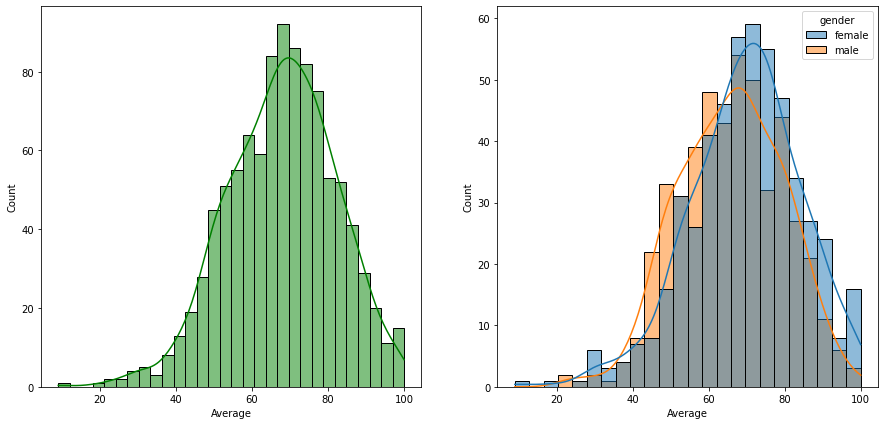

In [12]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data =df , x = 'Average', bins=30, kde = True, color ='g')

plt.subplot(122)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'gender')
plt.show()

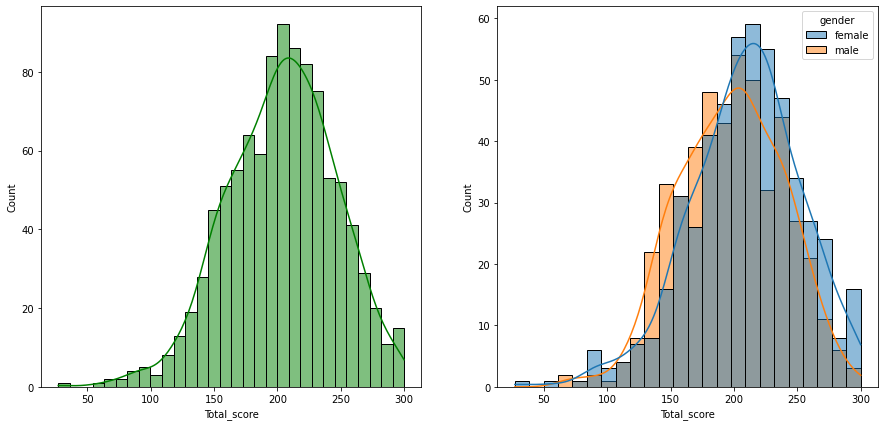

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data =df , x = 'Total_score', bins=30, kde = True, color ='g')

plt.subplot(122)
sns.histplot(data = df, x = 'Total_score', kde = True, hue = 'gender')
plt.show()

Female students are performing well with respecting to males.

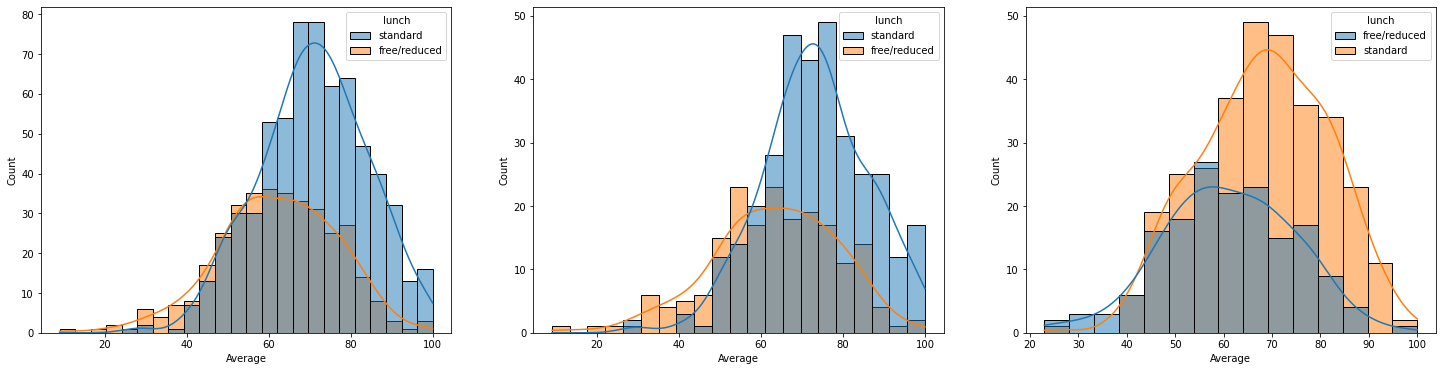

In [13]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data =df , x = 'Average', kde = True, hue = 'lunch')

plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x = 'Average', kde=True, hue = 'lunch')

plt.subplot(133)
sns.histplot(data = df[df.gender =='male'], x = 'Average', kde = True, hue = 'lunch')
plt.show()

Standard luch helps students to perform well in their studies compare to the free/reduced lunch

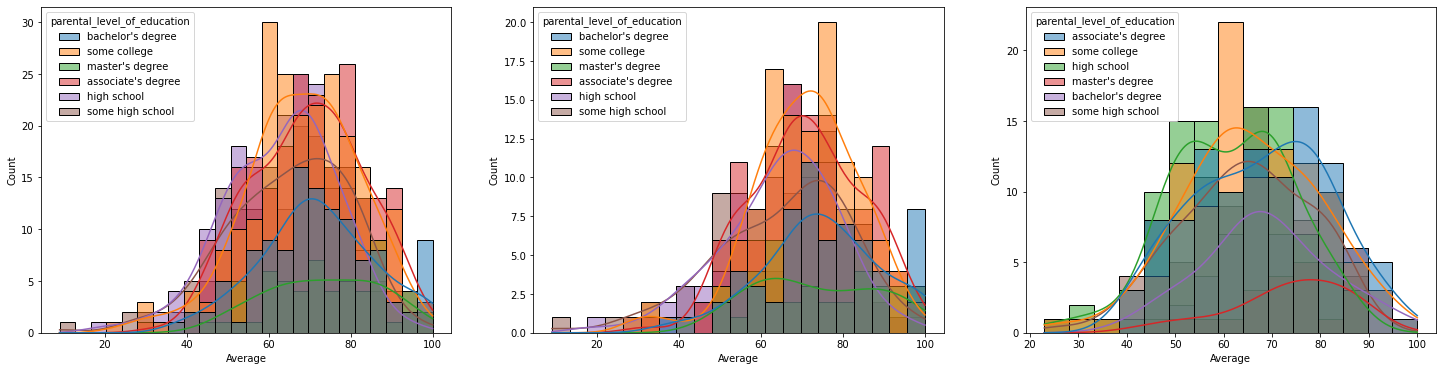

In [14]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data =df , x = 'Average', kde = True, hue = 'parental_level_of_education')

plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x = 'Average', kde=True, hue = 'parental_level_of_education')

plt.subplot(133)
sns.histplot(data = df[df.gender =='male'], x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.show()

first graph shows that parent_level_of_education is not effecting the performance of students in exams
second graph shows that parent_level_of_education is effecting the female students in their performance
third graph shows that parent_level_of_education is not at all effecting the male students in their performance

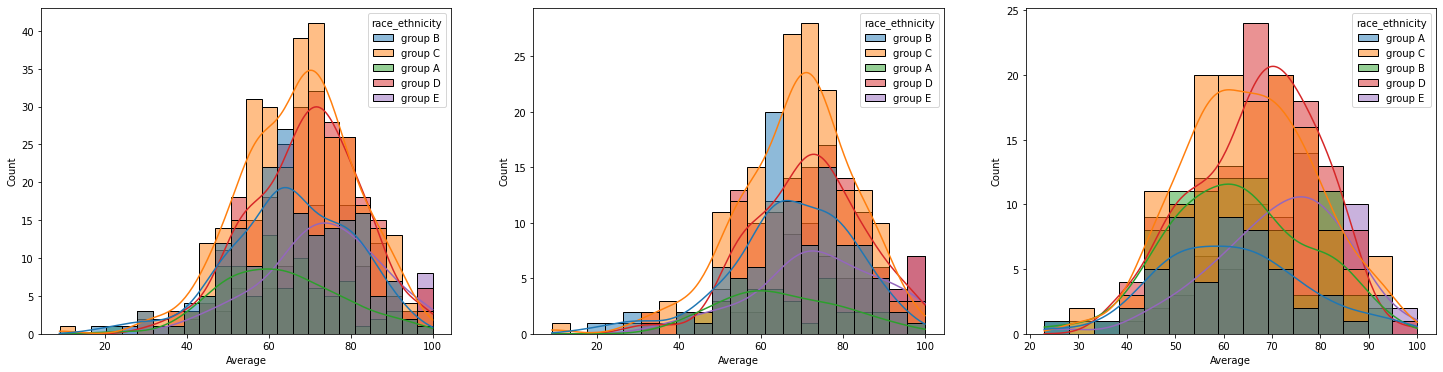

In [15]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))

plt.subplot(131)
sns.histplot(data =df , x = 'Average', kde = True, hue = 'race_ethnicity')

plt.subplot(132)
sns.histplot(data = df[df.gender=='female'], x = 'Average', kde=True, hue = 'race_ethnicity')

plt.subplot(133)
sns.histplot(data = df[df.gender =='male'], x = 'Average', kde = True, hue = 'race_ethnicity')
plt.show()

Race_ethnicity of 'group A' and 'group B' are performing poorly in exam irrespective of gender.

Maximum score of students in all three subjects

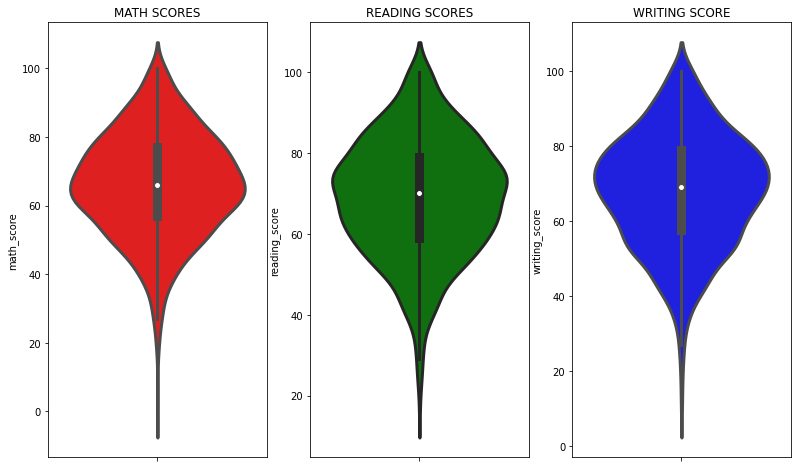

In [16]:
plt.figure(figsize=(18, 8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y = 'math_score', data = df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title("READING SCORES")
sns.violinplot(y = 'reading_score', data = df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title("WRITING SCORE")
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth=3)

plt.show()

From the above graphs we can say that most of the students are scoring 60-80 in math and between 50-80 in reading and writing exam

pie plot analysis

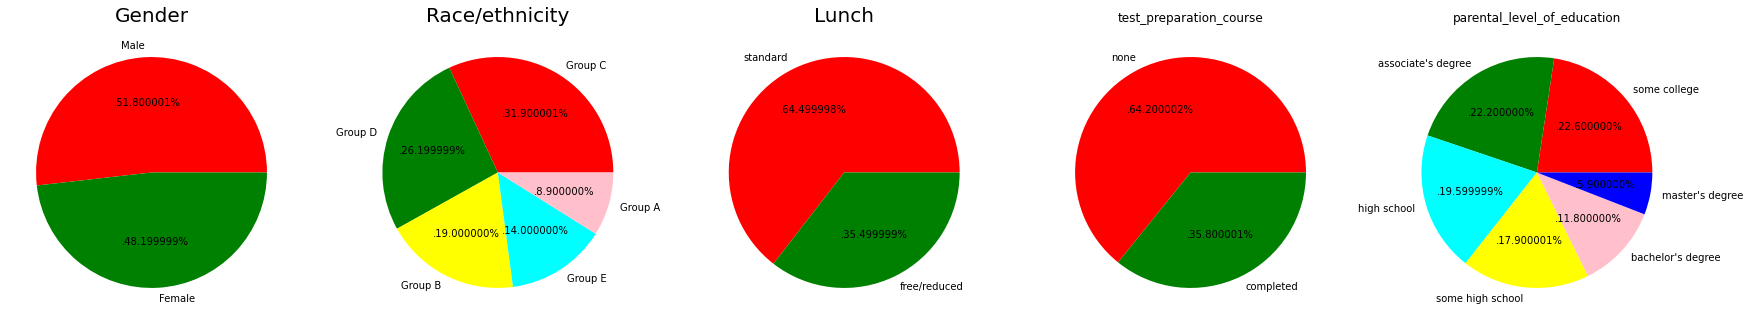

In [17]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Male', 'Female'
color = ['red', 'green']

plt.pie(size, colors = color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis("off")

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'yellow', 'cyan', 'pink']

plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('Race/ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red', 'green']

plt.pie(size, colors= color, labels=labels,  autopct= '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis("off")

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct= '.%2f%%')
plt.title("test_preparation_course")
plt.axis("off")

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'some college', "associate's degree", "high school", "some high school", "bachelor's degree", "master's degree"
color = ['red', 'green', 'cyan', 'yellow', 'pink', 'blue']

plt.pie(size, labels=labels, colors=color, autopct= '.%2f%%')
plt.title("parental_level_of_education")
plt.axis("off")



plt.show()

Number of males and females are almost equal
In race/ethnicity group C are greater than other groups
Most of the students are having standard lunch
Most of the students are not completing their test preparation course
Most of the students are enrolled in 'some college' under parental_level_of_education.

Distribution of gender

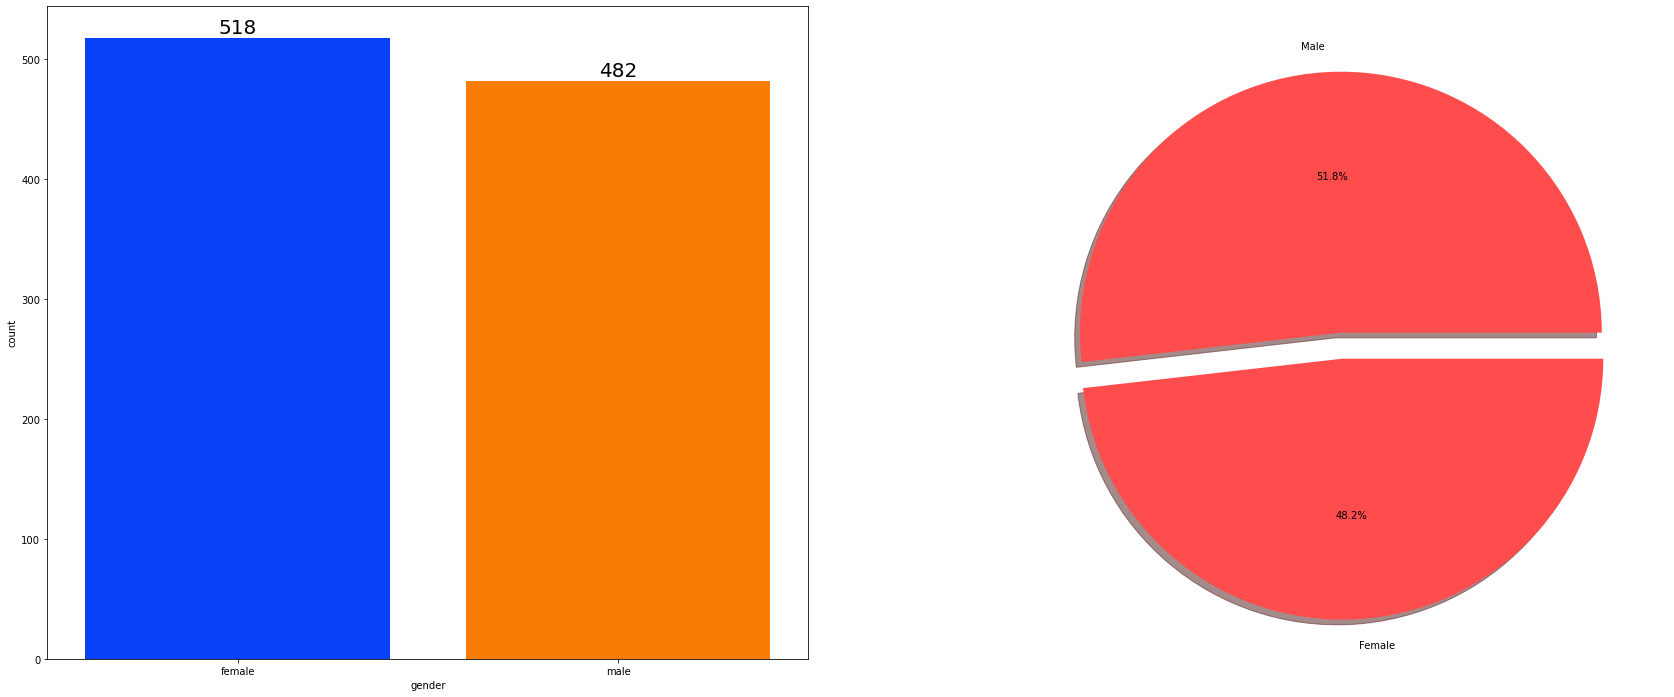

In [39]:
plt.subplot(1, 2, 1)
ax = sns.countplot(x = df['gender'], data = df, palette= 'bright',  saturation=0.95)

for label in ax.containers:
    ax.bar_label(label, size = 20)


plt.subplot(1, 2, 2)
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d'])
plt.show()

Students of gender 'Male' and 'Female' are almost equal with male as 51.8% and female as 48.2%

Gender has any impact on student performance?

In [40]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


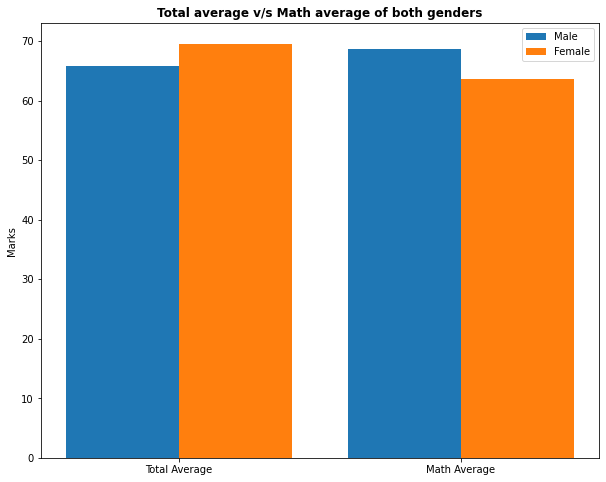

In [51]:
plt.figure(figsize=(10, 8))

x = ['Total Average', 'Math Average']

female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2, male_scores, 0.4, label= 'Male')
plt.bar(x_axis +0.2, female_scores, 0.4, label = 'Female')

plt.xticks(x_axis, x)
plt.ylabel("Marks")
plt.title("Total average v/s Math average of both genders", fontweight = 'bold')
plt.legend()
plt.show()

On Total average females have scored good marks and in math average males have scored good marks

In [ ]:
Race_ethnicity

Checking the distribution of the groups under race_ethnicity

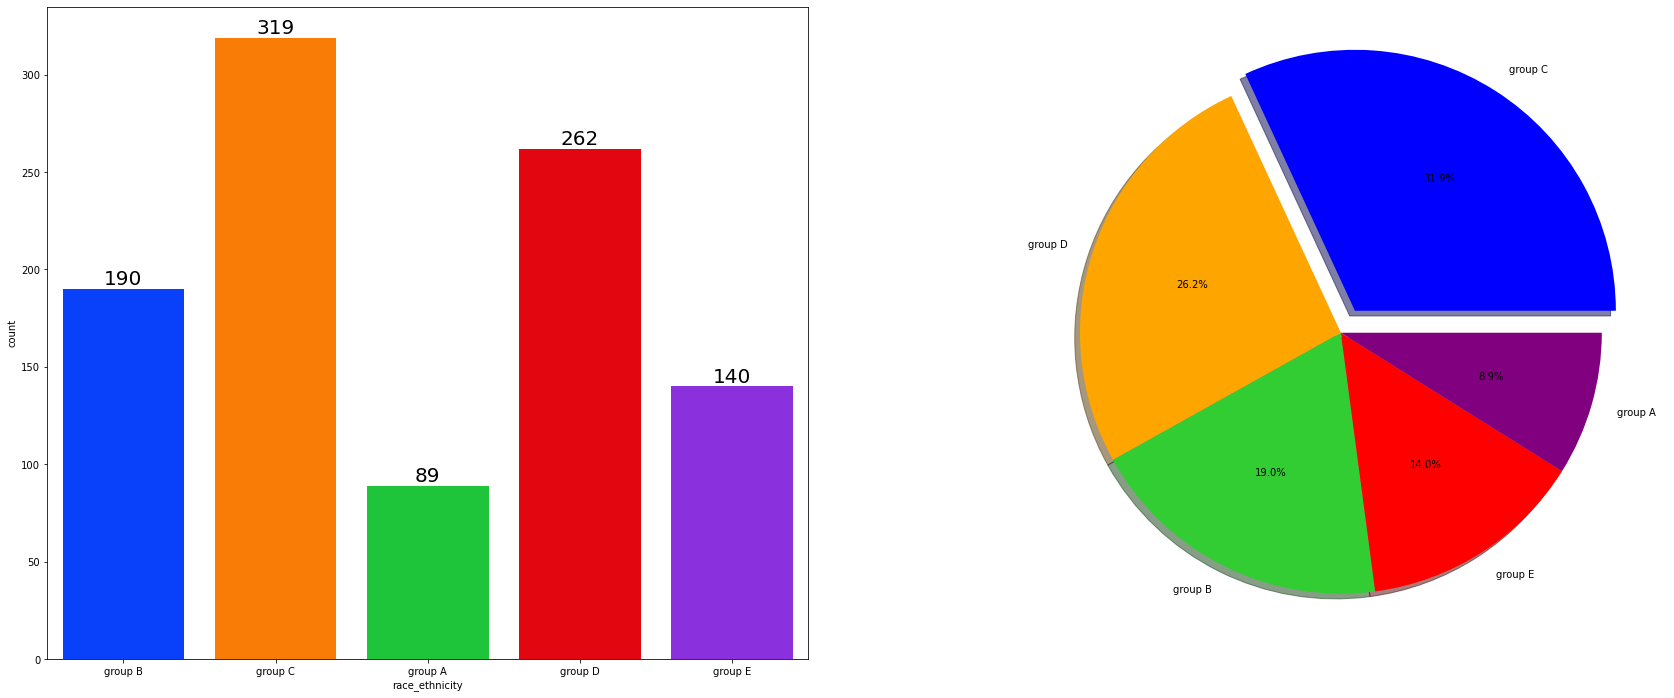

In [59]:
plt.subplot(1, 2, 1)
ax = sns.countplot(x = df['race_ethnicity'], data = df, palette= 'bright',  saturation=0.95)

for label in ax.containers:
    ax.bar_label(label, size = 20)


plt.subplot(1, 2, 2)
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True, colors=['blue', 'orange', 'limegreen', 'red', 'purple'])
plt.show()

Most of the students belong to group C and group D
Group A has the lowest number of students

Race_ethnicity has any impact on student performance

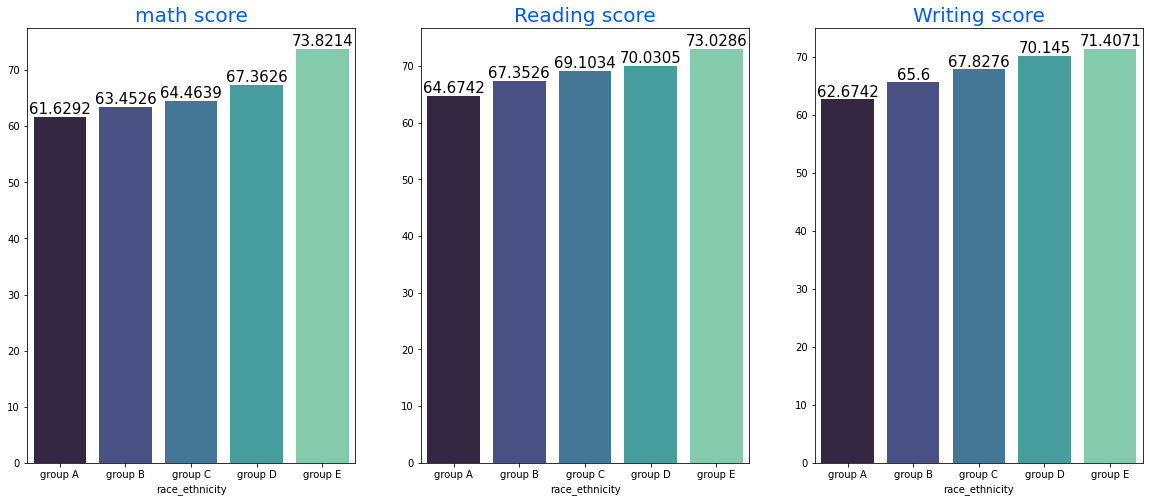

In [67]:
group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize = (20, 8))
sns.barplot(x= group_data2['math_score'].mean().index, y = group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('math score', color = '#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15)


sns.barplot(x= group_data2['reading_score'].mean().index, y = group_data2['reading_score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading score', color = '#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)

sns.barplot(x= group_data2['writing_score'].mean().index, y = group_data2['writing_score'].mean().values, palette='mako', ax=ax[2])
ax[2].set_title('Writing score', color = '#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)

Group E students have scored highest marks in all subjects
Whereas Group A students have scored lowest marks in all subjects

Parental level of education
Does parental level of education have any impace on student's performance

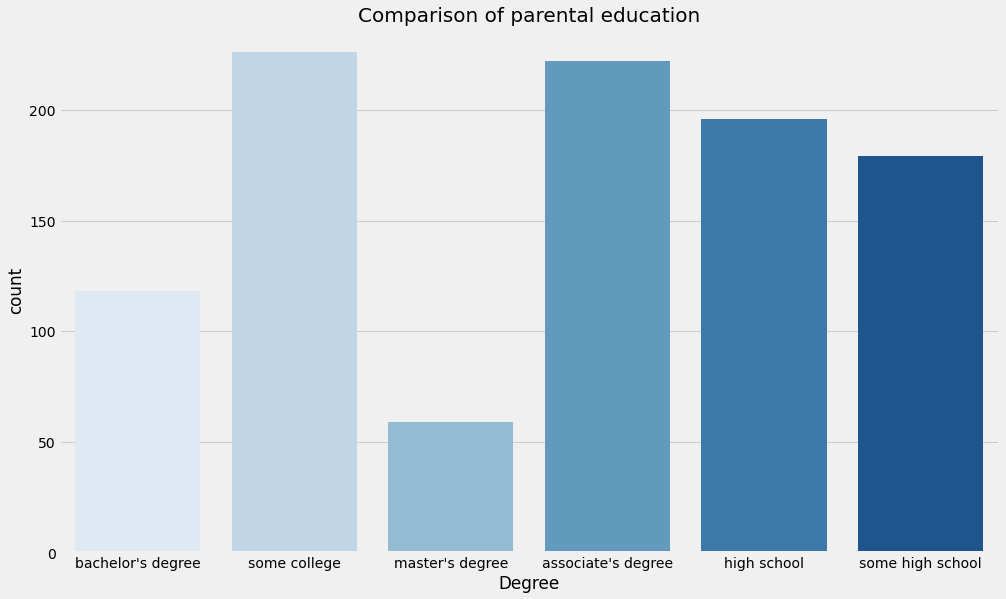

In [74]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparison of parental education', fontweight= 30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

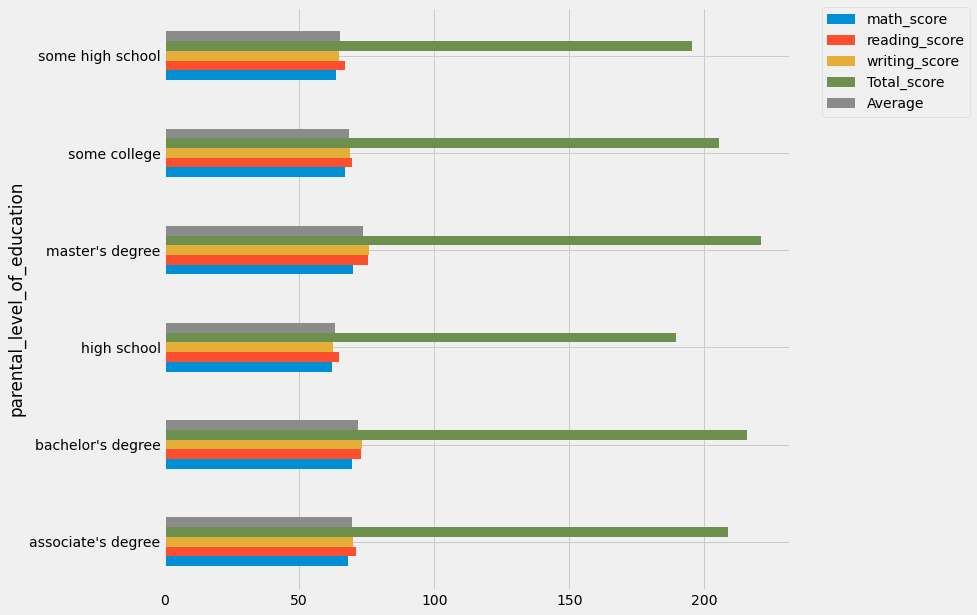

In [76]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The student's parents whose education background is Master and bachelor's degree are having highest score compared to others

Distribution of lunch
Does lunch effect the student's performance

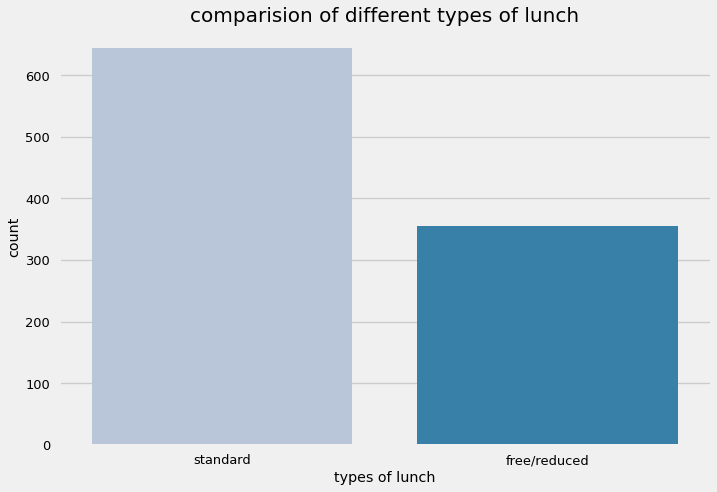

In [80]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('comparision of different types of lunch', fontweight= 30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Most of the students are having standard lunch

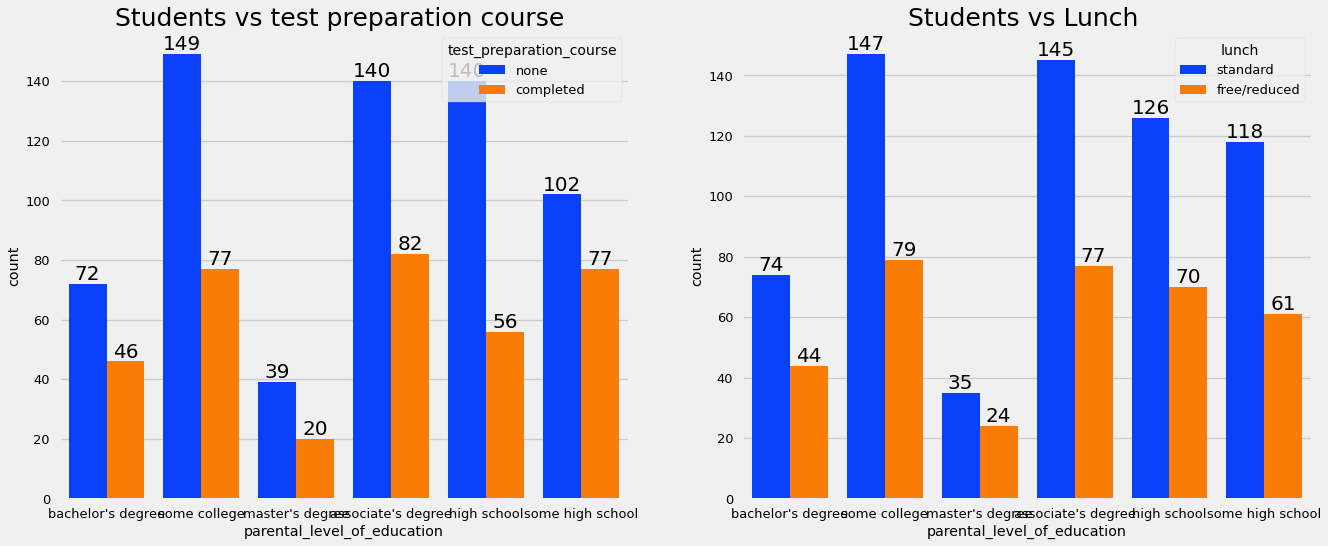

In [91]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs Lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

Students having standard lunch are performing well

Test preparation

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

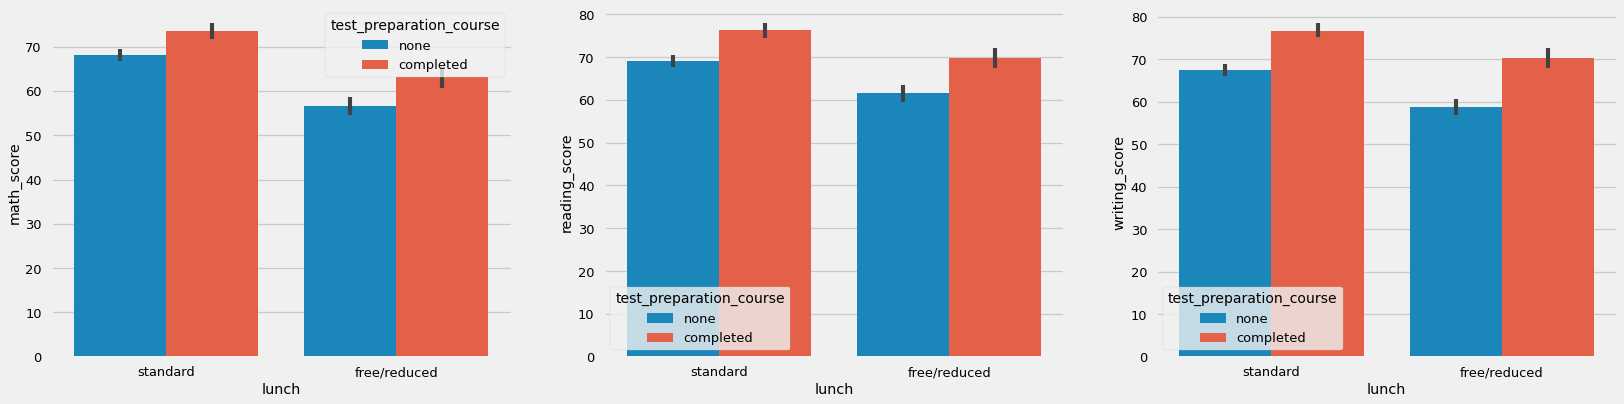

In [99]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
sns.barplot(x = df['lunch'], y = df['math_score'], hue= df['test_preparation_course'])
plt.subplot(1,3,2)
sns.barplot(x = df['lunch'], y = df['reading_score'], hue= df['test_preparation_course'])
plt.subplot(1,3,3)
sns.barplot(x = df['lunch'], y = df['writing_score'], hue= df['test_preparation_course'])

Students who have performed their test preparation are performing well than other students who have not completed.

CHECKING OUTLIERS

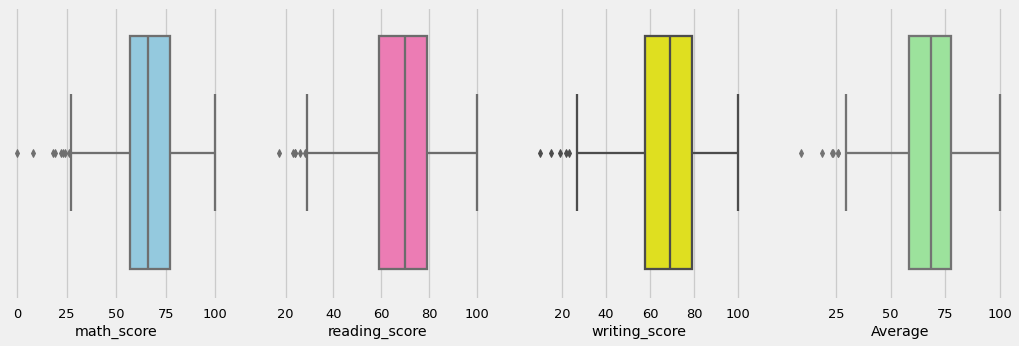

In [101]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


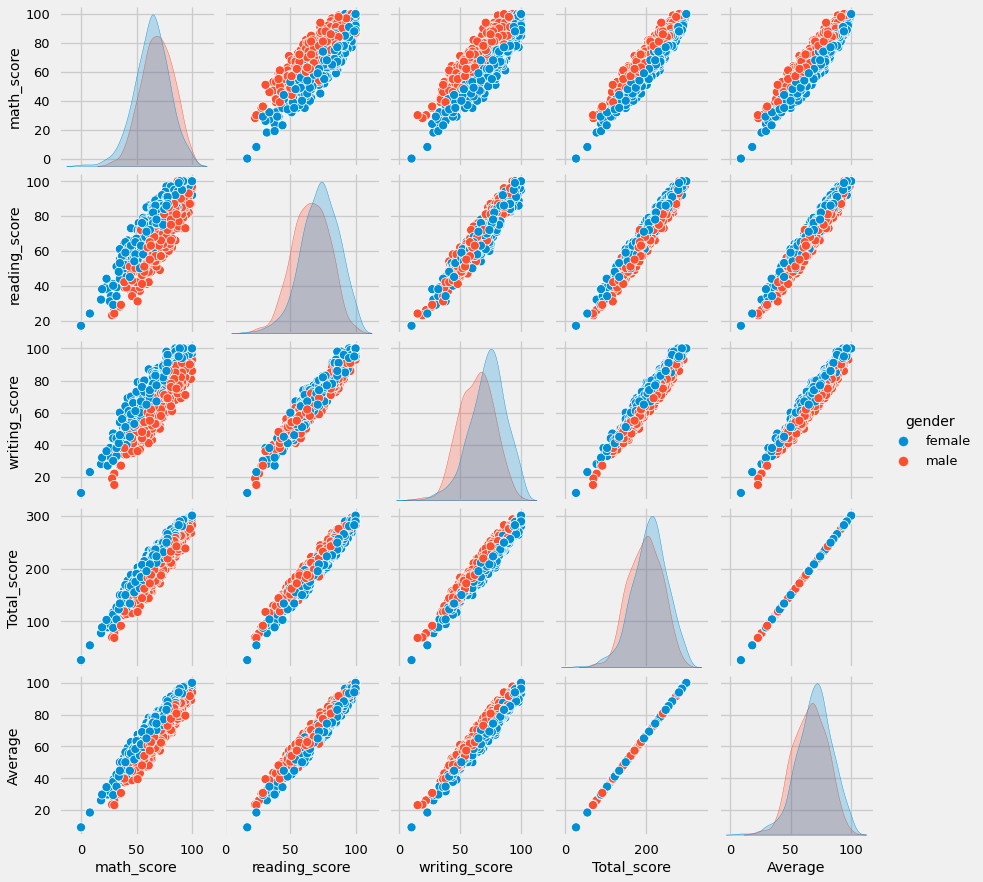

In [105]:
sns.pairplot(df,hue = 'gender')
plt.show()

MY-CONCLUSIONS:

students performance is effected by lunch, parental_level_of_education, race
female students are leading
students who complete test_preparation are scoring good marks